In [38]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [39]:
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')

In [40]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name = 'skill_count').sort_values('skill_count', ascending = False)
df_skills_count


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [41]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

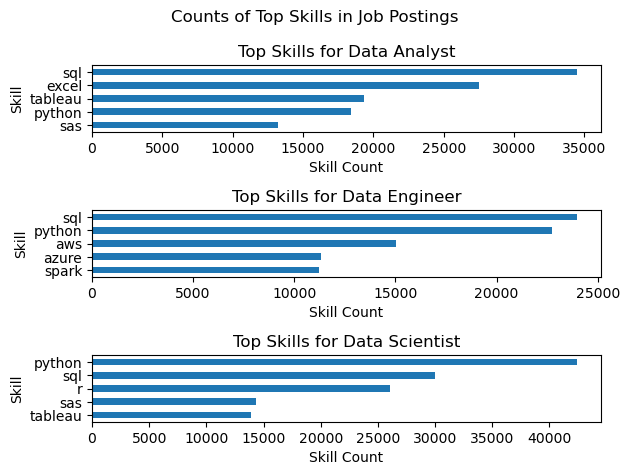

In [42]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False)
    ax[i].set_title(f"Top Skills for {title}")
    ax[i].invert_yaxis()
    ax[i].set_xlabel("Skill Count")
    ax[i].set_ylabel("Skill")

plt.suptitle('Counts of Top Skills in Job Postings')
plt.tight_layout()
plt.show()

In [43]:
df_idw = df_US['job_title_short'].value_counts()
df_idw = df_idw.to_frame()
df_idw

,count
job_title_short,
Data Analyst,67816
Data Scientist,58830
Data Engineer,35080
Senior Data Scientist,12946
Senior Data Analyst,11791
Senior Data Engineer,9289
Business Analyst,7382
Software Engineer,1814
Machine Learning Engineer,921


In [44]:
merged_df = df_skills_count.merge(df_idw, on='job_title_short', how='left')
merged_df['skills_likeliness'] = 100* merged_df['skill_count']/merged_df['count']
merged_df

,job_skills,job_title_short,skill_count,count,skills_likeliness
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


In [45]:
job_titles = merged_df['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

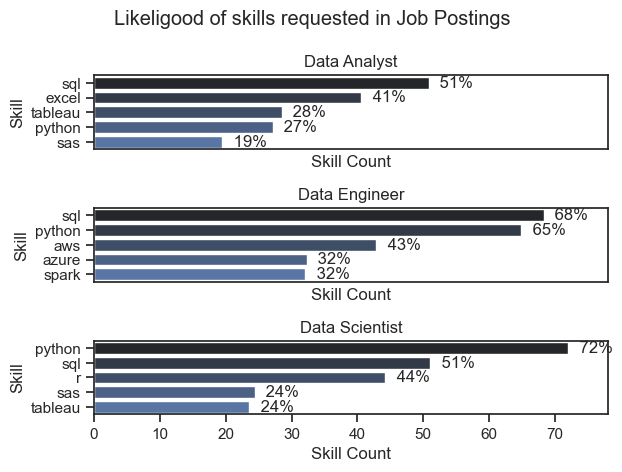

In [61]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style= 'ticks')

for i, title in enumerate(job_titles):
    df_plot = merged_df[merged_df['job_title_short'] == title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skills_likeliness', ax=ax[i], legend=False)
    sns.barplot(
        data=df_plot,
        x='skills_likeliness',
        y='job_skills',
        hue='job_skills',
        palette='dark:b',
        ax=ax[i],
        legend=False
    )

    ax[i].set_title(title)
    ax[i].set_xlabel("Skill Count")
    ax[i].set_ylabel("Skill")
    ax[i].set_xlim(0, 78)

    for n,v in enumerate(df_plot['skills_likeliness']):
        ax[i].text(v+1, n, f'{v: .0f}%', va = 'center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

   

plt.suptitle('Likeligood of skills requested in Job Postings')
plt.tight_layout()
plt.show()